<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/SVM_Machine_Learning/blob/main/Svc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [91]:
## importing the data:
data = pd.read_csv("/content/Iris.csv")
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,107,4.9,2.5,4.5,1.7,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
83,84,6.0,2.7,5.1,1.6,Iris-versicolor


In [92]:
## data information and checking
print(f"data:\n{data.info()}")
### checking for null value:
print(f"\n null values in dataset:\n{data.isnull().sum()}")

## Checking for the duplicated values:
print(f"\n total duplicated values: {data.duplicated().sum()}")

## checking shape
print(f"\n data shape: {data.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
data:
None

 null values in dataset:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

 total duplicated values: 0

 data shape: (150, 6)


## data look clean let's visualise the data:

In [93]:
## droping not required column and seperating feature and Target:
drop_col = ["Id","Species"]
x = data.drop(drop_col, axis = 1 )
y = data["Species"]

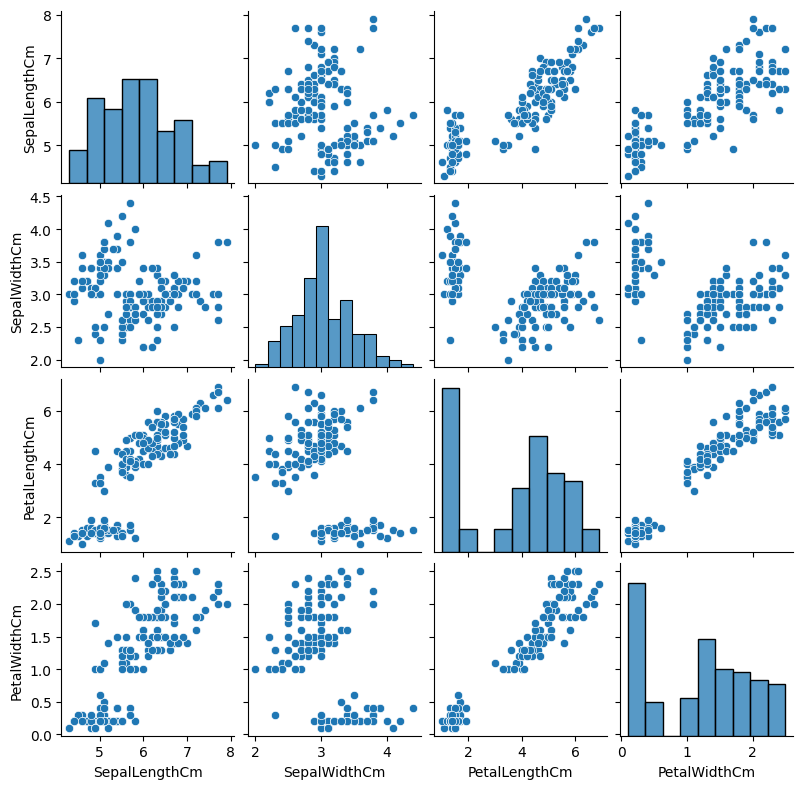

In [138]:
sns.pairplot(x,  height=2);


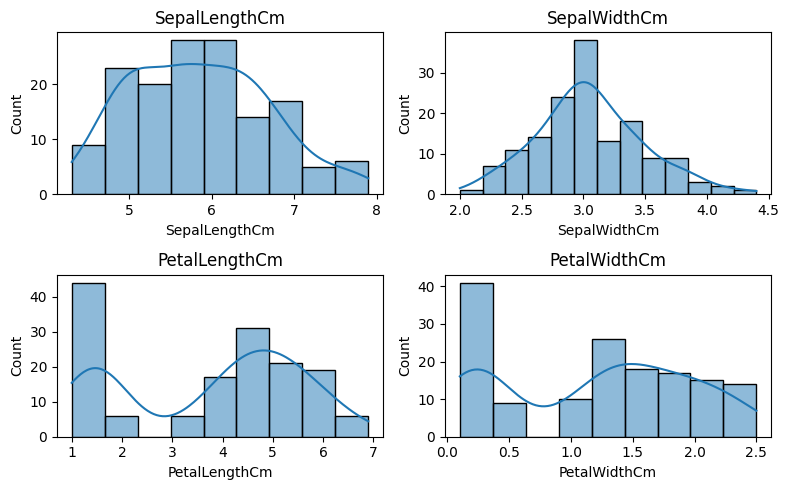

In [22]:
colm = []
for i in x.columns:
    colm.append(i)
num_rows = 2
num_cols = 2

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 5))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(colm):
    sns.histplot(x[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

<Axes: >

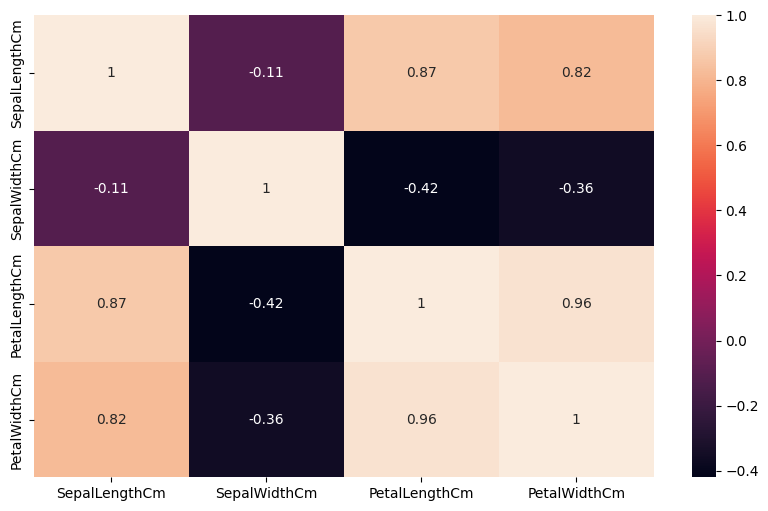

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(), annot=True)

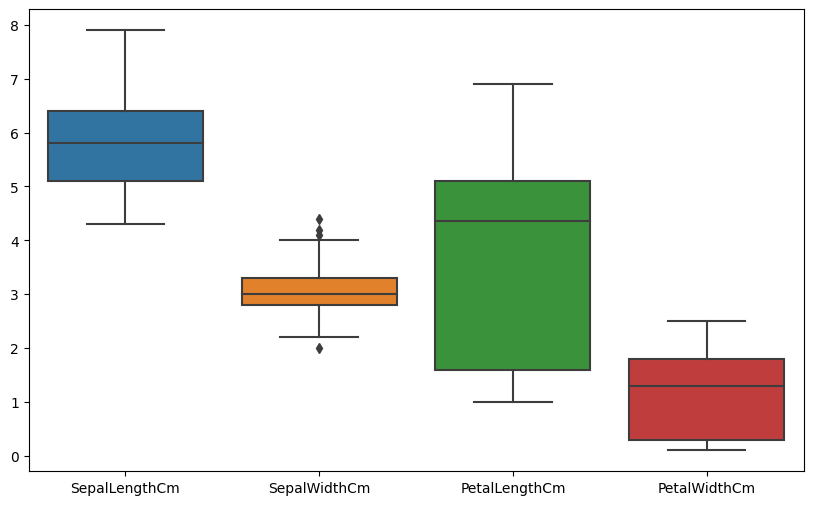

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x);

In [28]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [26]:

## defining the function for inter qantile range
def ranges(column,quant_1,quant_3):
    q1 = np.percentile(column,quant_1)
    q3 = np.percentile(column,quant_3)
    iqr = q3-q1

    ## higher bound:
    lower_bound = q1 = (1.5 * iqr)
    higher_bound = q3 + (1.5 * iqr)

    lower_bound = np.round(lower_bound,2)
    higher_bound = np.round(higher_bound,2)


    print(f"Q1 ({quant_1} percentile){q1}")
    print(f"Q3 ({quant_3} percentile){q3}")
    print(f"inter qantile range: {iqr}")
    print(f"lower_fence:{lower_bound}")
    print(f"higher_fence:{higher_bound}")


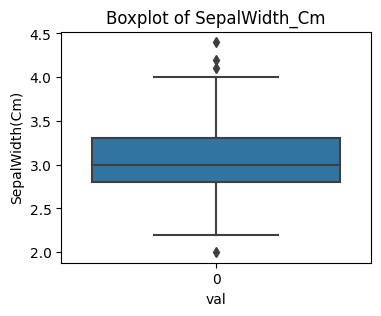

In [30]:
## boxplot for temp
plt.figure(figsize=(4, 3))
sns.boxplot(x.SepalWidthCm)
plt.xlabel('val')
plt.ylabel('SepalWidth(Cm)')
plt.title('Boxplot of SepalWidth_Cm');

In [55]:
## quantile range for Rain
## quntile range
sepal = x.SepalWidthCm
quant_1 = 25
quant_3 = 75

ranges(sepal, quant_1, quant_3)

Q1 (25 percentile)0.75
Q3 (75 percentile)3.3
inter qantile range: 0.5
lower_fence:0.75
higher_fence:4.05


In [48]:
# SepalWidthCm greater than higher fence
x[x.SepalWidthCm > 4.0].count()

SepalLengthCm    3
SepalWidthCm     3
PetalLengthCm    3
PetalWidthCm     3
dtype: int64

In [47]:
# SepalWidthCm less than lower fence:
x[x.SepalWidthCm < 2.3].count()

SepalLengthCm    4
SepalWidthCm     4
PetalLengthCm    4
PetalWidthCm     4
dtype: int64

In [49]:
max = 4
min = 2.3
for i in range(len(x.SepalWidthCm)):
    if x["SepalWidthCm"].values[i] >  max:
        x["SepalWidthCm"].values[i] = max
    elif x["SepalWidthCm"].values[i] < min:
        x["SepalWidthCm"].values[i] = min

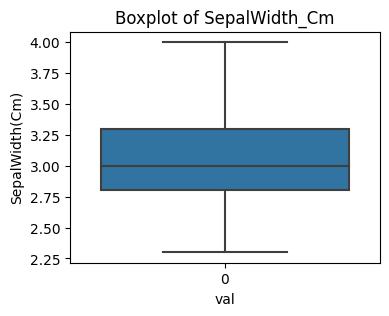

In [56]:
## boxplot for temp
plt.figure(figsize=(4, 3))
sns.boxplot(x.SepalWidthCm)
plt.xlabel('val')
plt.ylabel('SepalWidth(Cm)')
plt.title('Boxplot of SepalWidth_Cm');

In [57]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.053333,0.413313,2.3,2.8,3.00,3.3,4.0
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [61]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [98]:
## converting the target into numerical categories using map function:
# mapping y  as 'Iris-setosa': '0', 'Iris-versicolor': '1','Iris-virginica':'2'
y = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1,'Iris-virginica':2})

In [102]:
y.sample(5)

58    1
76    1
82    1
68    1
23    0
Name: Species, dtype: int64

In [104]:
### import from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [105]:
## train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

print("shape of x_train{} and have dimension: {}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension: {}" .format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension: {}".format(x_test.shape, x_test.ndim))
print("shape of y_test{} and have dimension:  {}".format(y_test.shape, x_test.ndim))

shape of x_train(120, 4) and have dimension: 2
shape of y_train(120,) and have dimension: 1
shape of x_test(30, 4)  and have dimension: 2
shape of y_test(30,) and have dimension:  2


In [111]:
# scaling x_train and x_test
clf = StandardScaler()
scaled_x_train = clf.fit_transform(x_train)
scaled_x_test  = clf.transform(x_test)

print("shape of scaled_x_train{} and have dimension: {}".format(scaled_x_train.shape, scaled_x_train.ndim))
print("shape of scaled_x_test{}  and have dimension: {}".format(scaled_x_test.shape, scaled_x_test.ndim))
scaled_x_train[3]

shape of scaled_x_train(120, 4) and have dimension: 2
shape of scaled_x_test(30, 4)  and have dimension: 2


array([-1.23014297,  0.77046987, -1.21993869, -1.30948358])

In [112]:
## support vector classification:
from sklearn.svm import SVC

model = SVC()
svc_model = model.fit(scaled_x_train, y_train)


In [113]:
## making predictions :
y_pred = svc_model.predict(scaled_x_test)

In [117]:

## compairing the prediction with truth values:
print("y_pred dimensions :",y_pred.ndim)
print("y_test dimension :", y_test.ndim)
"""
y_pred_flatten = y_pred.flatten()
y_test_flatten = y_test.values.flatten()
print(y_pred_flatten.ndim)
print(y_test_flatten.ndim)
"""



prediction_result = []

j=0
for i in y_test:
    if i == y_pred[j]:
        results = "correct_prediction"
        prediction_result.append(results)

    else:
        results = "wrong_prediction"
        prediction_result.append(results)
    j = j+1

prediction_table = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred , "prediction_result" : prediction_result })



y_pred dimensions : 1
y_test dimension : 1


In [118]:
prediction_table.sample(30)

,Actual,Predict,prediction_result
132,2,2,correct_prediction
104,2,2,correct_prediction
76,1,1,correct_prediction
141,2,2,correct_prediction
127,2,2,correct_prediction
36,0,0,correct_prediction
118,2,2,correct_prediction
110,2,2,correct_prediction
18,0,0,correct_prediction
68,1,1,correct_prediction


In [119]:
## prefomance matric classification:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

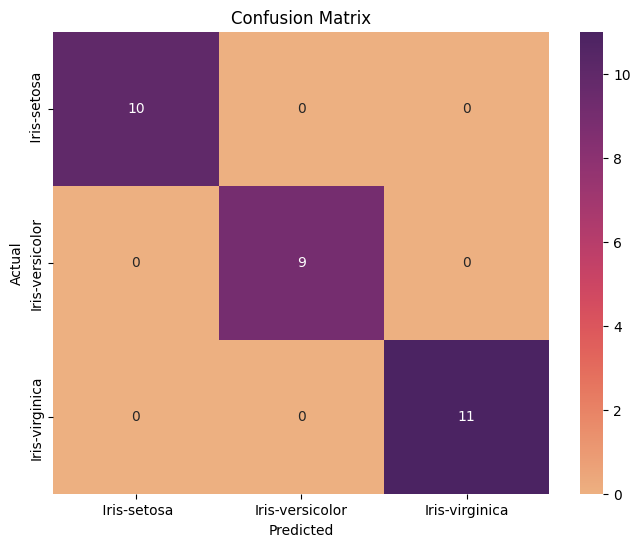

In [121]:
# Generate a confusion matrix  [# mapped y  as 'Iris-setosa': '0', 'Iris-versicolor': '1','Iris-virginica':'2']
cm = confusion_matrix(y_test, y_pred)

# Create a figure
plt.figure(figsize=(8, 6))

# Use Seaborn's heatmap to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='flare', cbar=True,
            xticklabels=[' Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=[' Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [122]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [131]:
f1 = f1_score(y_test, y_pred,  average='weighted')
acc = accuracy_score(y_test, y_pred)
print(f"f1_score : {round(f1,2)}")
print(f"accuracy_score: {round(acc,2)}")

f1_score : 1.0
accuracy_score: 1.0


In scikit-learn, when dealing with multiclass classification, you need to select an appropriate averaging strategy for these metrics. The options are:

- None: This will return an array of metrics for each class separately.

- micro: This computes the metric globally across all classes by considering all instances together.

- macro: This computes the metric for each class independently and then takes the unweighted average.

- weighted: This computes the metric for each class independently and then takes the average weighted by the number of samples in each class.

- If we're using a function like precision_score, recall_score, or f1_score in scikit-learn,need to make sure to set the average parameter correctly according to your specific use case.
---
---
